# TextBlob NLP library

Applying the `TextBlob` python library to generate sentiment scores for each blog entry in the dataset. Note that only `polarity scores` are included to determine whether a blog post scores positive or negative according to the TextBlob algorithm.

In [1]:
import pandas as pd
from textblob import TextBlob

In [2]:
# Read original dataset into df
df = pd.read_csv('blog_spot.csv', index_col=0)

## Standard text clean up and processing

In [3]:
df = df.applymap(lambda x : str(x).lower())

In [4]:
# Function to apply sentiment module
def get_polarity(text):
    """Get the text polarity score using TextBlob"""
    return TextBlob(text).sentiment.polarity

In [5]:
df1 = df.applymap(lambda text : get_polarity(text))

## Data visualization

The histogram below shows how the blog posts are normally distributed across the sentiment spectrum.

In [6]:
import matplotlib.pyplot as plt

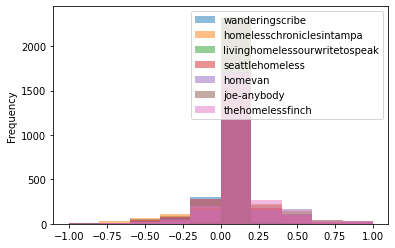

In [7]:
df1.plot.hist(alpha=0.5)

In [8]:
# Descriptive summary of sentiment polarity scores
df1.describe()

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,0.050486,0.052295,0.008080,0.042578,0.067480,0.002645,0.070127
std,0.216771,0.259855,0.057511,0.206941,0.225238,0.036567,0.192350
min,-1.000000,-1.000000,-0.327778,-1.000000,-1.000000,-0.600000,-0.800000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.125000,0.125000,0.000000,0.097098,0.062500,0.000000,0.116667
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.700000,1.000000


The bar graph below plots the mean polarity scores for all of the blogs. From this we can see that the mean scores are relatively neutral in content, with a slight bias towards the positive end of the scale.

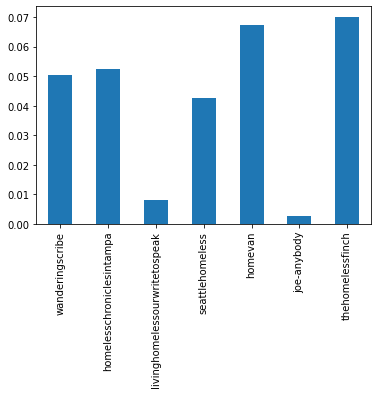

In [9]:
df1.mean().plot(kind='bar')

## Comparing frequency counts for positive and negative posts

In [10]:
df2 = df1.applymap(lambda x : float("{:.2f}".format(x)))

In [11]:
def post_sent(score):
    """Determine if a post is postive, neutral or negative"""
    if score < 0:
        return 'n'
    elif score == 0:
        return '-'
    elif score > 0:
        return 'p'

In [12]:
df3 = df2.applymap(lambda x : post_sent(x))

In [13]:
df3

,wanderingscribe,homelesschroniclesintampa,livinghomelessourwritetospeak,seattlehomeless,homevan,joe-anybody,thehomelessfinch
0,-,p,-,-,-,-,-
1,p,-,n,-,-,p,p
2,n,p,p,p,-,-,p
3,p,n,p,-,-,-,-
4,n,-,p,-,-,-,n
...,...,...,...,...,...,...,...
2358,-,p,-,-,-,-,-
2359,-,-,-,-,-,-,-
2360,-,p,-,-,p,-,-
2361,-,-,-,-,p,-,-


In [14]:
# TODO - plot number of pos vs neg posts